## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [2]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Random state seed
rseed = 42

## Load and explore data

In [4]:
# Import the dataset
# Load the dataset
data = pd.read_csv('Country-data.csv')

In [6]:
# Check the shape
data.shape

(167, 10)

There are 167 rows and 10 columns.

In [7]:
# Check datatypes & counts
# Check data types and non-null counts
print("Data Types and Non-Null Counts:")
print(data.info())

# Display first few rows to understand the data
print("\nFirst Few Rows of the Dataset:")
print(data.head())

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None

First Few Rows of the Dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17    

In [8]:
# Get descriptive statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.

In [9]:
# Identify any missing data
missing_data = data.isnull().sum()

print("Missing Values in Each Column:")
print(missing_data)

Missing Values in Each Column:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


There seems to be no missing data.

In [16]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Preprocessing and Feature Selection

In [11]:
# Drop any non-numeric features (columns)
data_cleaned = data.dropna()

# Drop columns with any missing values
data_cleaned = data.dropna(axis=1)

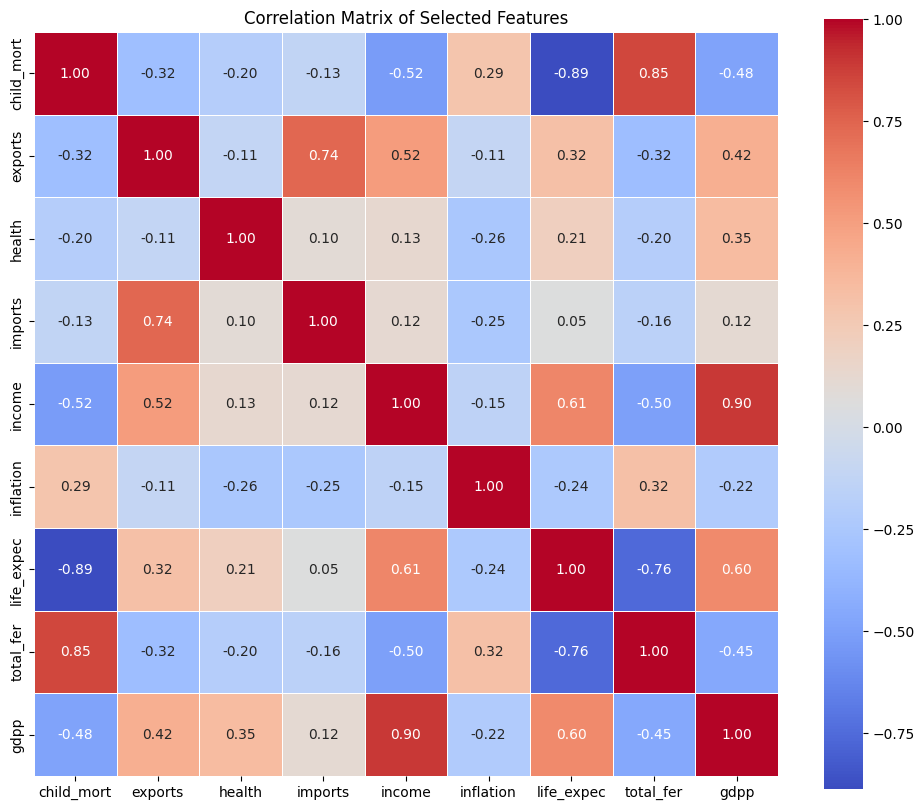

In [22]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
# Specify the features for the heatmap
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Select only the specified features
data_selected = data[features]

# Compute the correlation matrix
correlation_matrix = data_selected.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Set the title
plt.title('Correlation Matrix of Selected Features')
plt.show()

GDPP is strongly correlated with income (0.90), life expectancy (0.6) and with a weak positive correlation with
exports, and health. These indicate the presence of potential clusters. There is a negative correlation between GDPP and child mortality and total_fer.

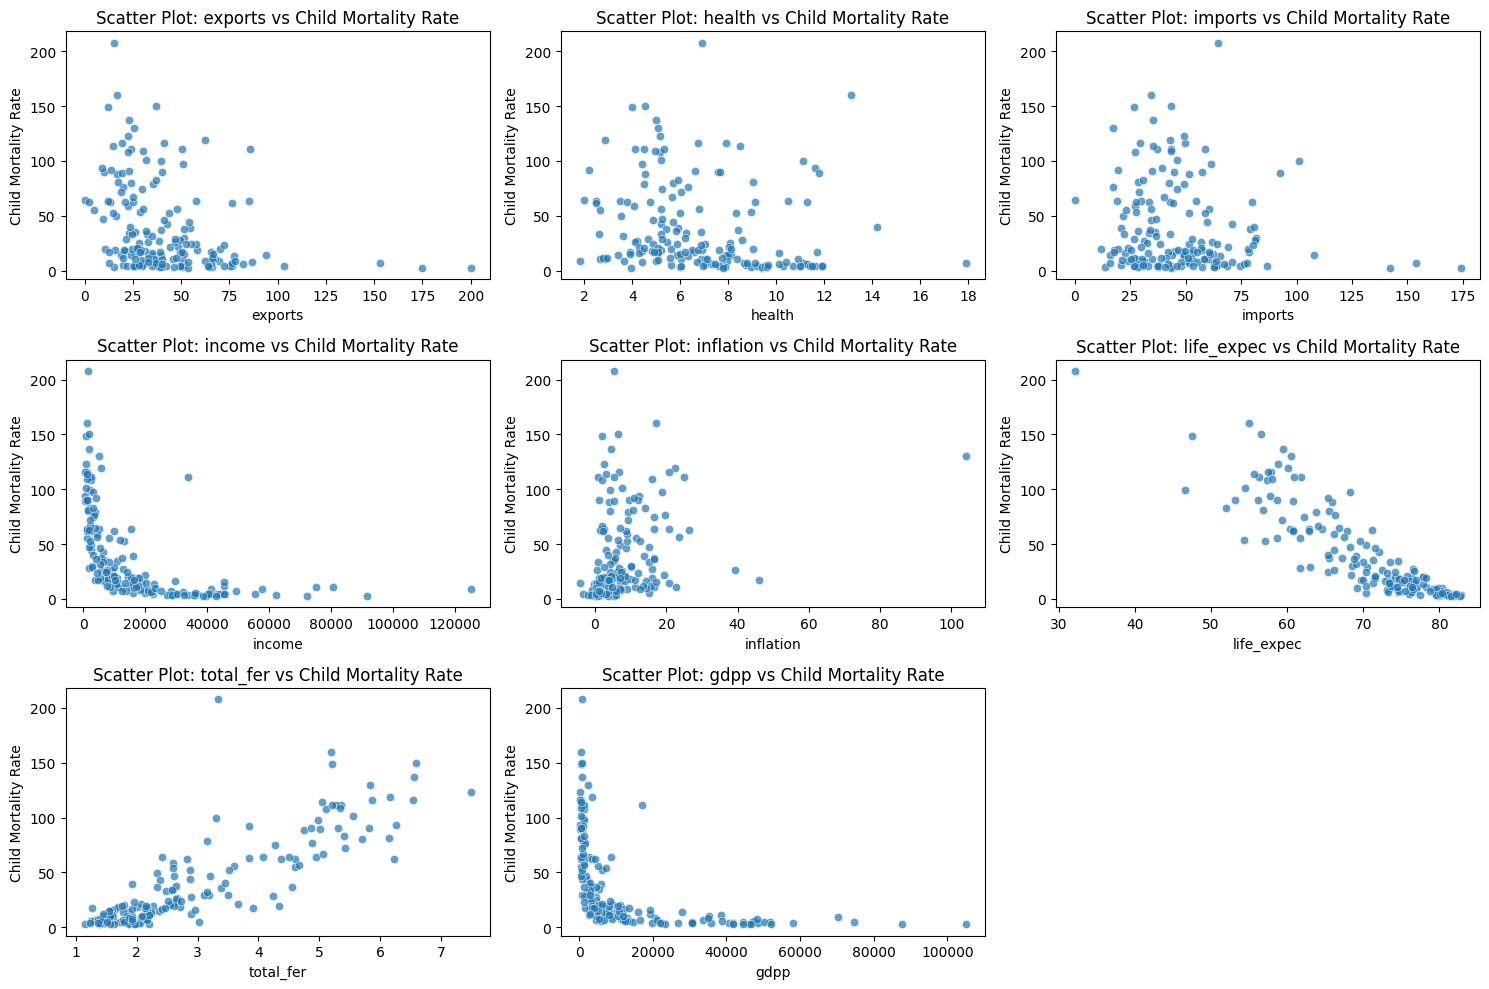

In [29]:
# Explore the continuous independent features against child_mort using scatter plots.
# Continuous independent features

continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create scatter plots with hue
plt.figure(figsize=(15, 10))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=data, x=feature, y='child_mort', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Child Mortality Rate')
    plt.title(f'Scatter Plot: {feature} vs Child Mortality Rate')

plt.tight_layout()
plt.show()

Child mortality rate versus income could suit a polynomial regression. This is also true for child mortality rate versus gdpp.
Child mortality rate versus health or imports charts seem to suggest a normal distribution.
The other two graphs on child mortality vesus total fertility or life expectancy suggest there is a positive correlation and a negative correlation respectively. Most of the scatter plots show some potential clustering.

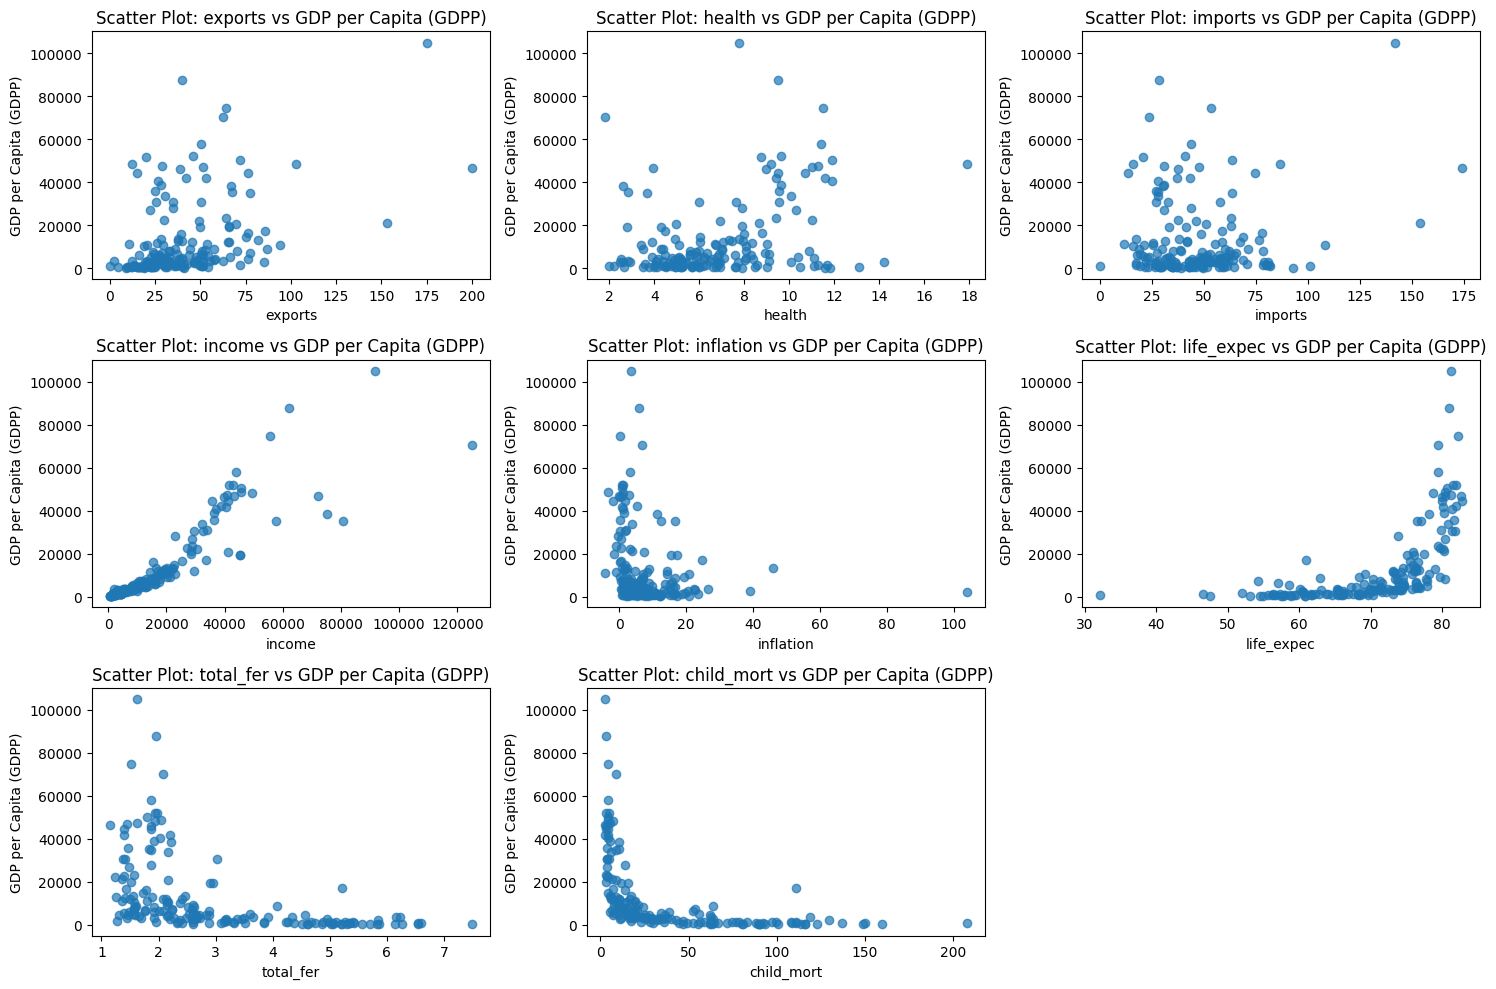

In [24]:
# Explore the continuous independent features against gdpp using scatter plots.
# Continuous independent features
continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort']

# Create scatter plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(data[feature], data['gdpp'], alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('GDP per Capita (GDPP)')
    plt.title(f'Scatter Plot: {feature} vs GDP per Capita (GDPP)')

plt.tight_layout()
plt.show()

GDP per capita versus exports, health or imports data could be normalised.
There are three possible polynomial distributions: GDPP versus income (possibly cuadratic), GDPP versus total fertility and then GDPP versus life expectancy.
GDPP versus income for example shows potential clustering.

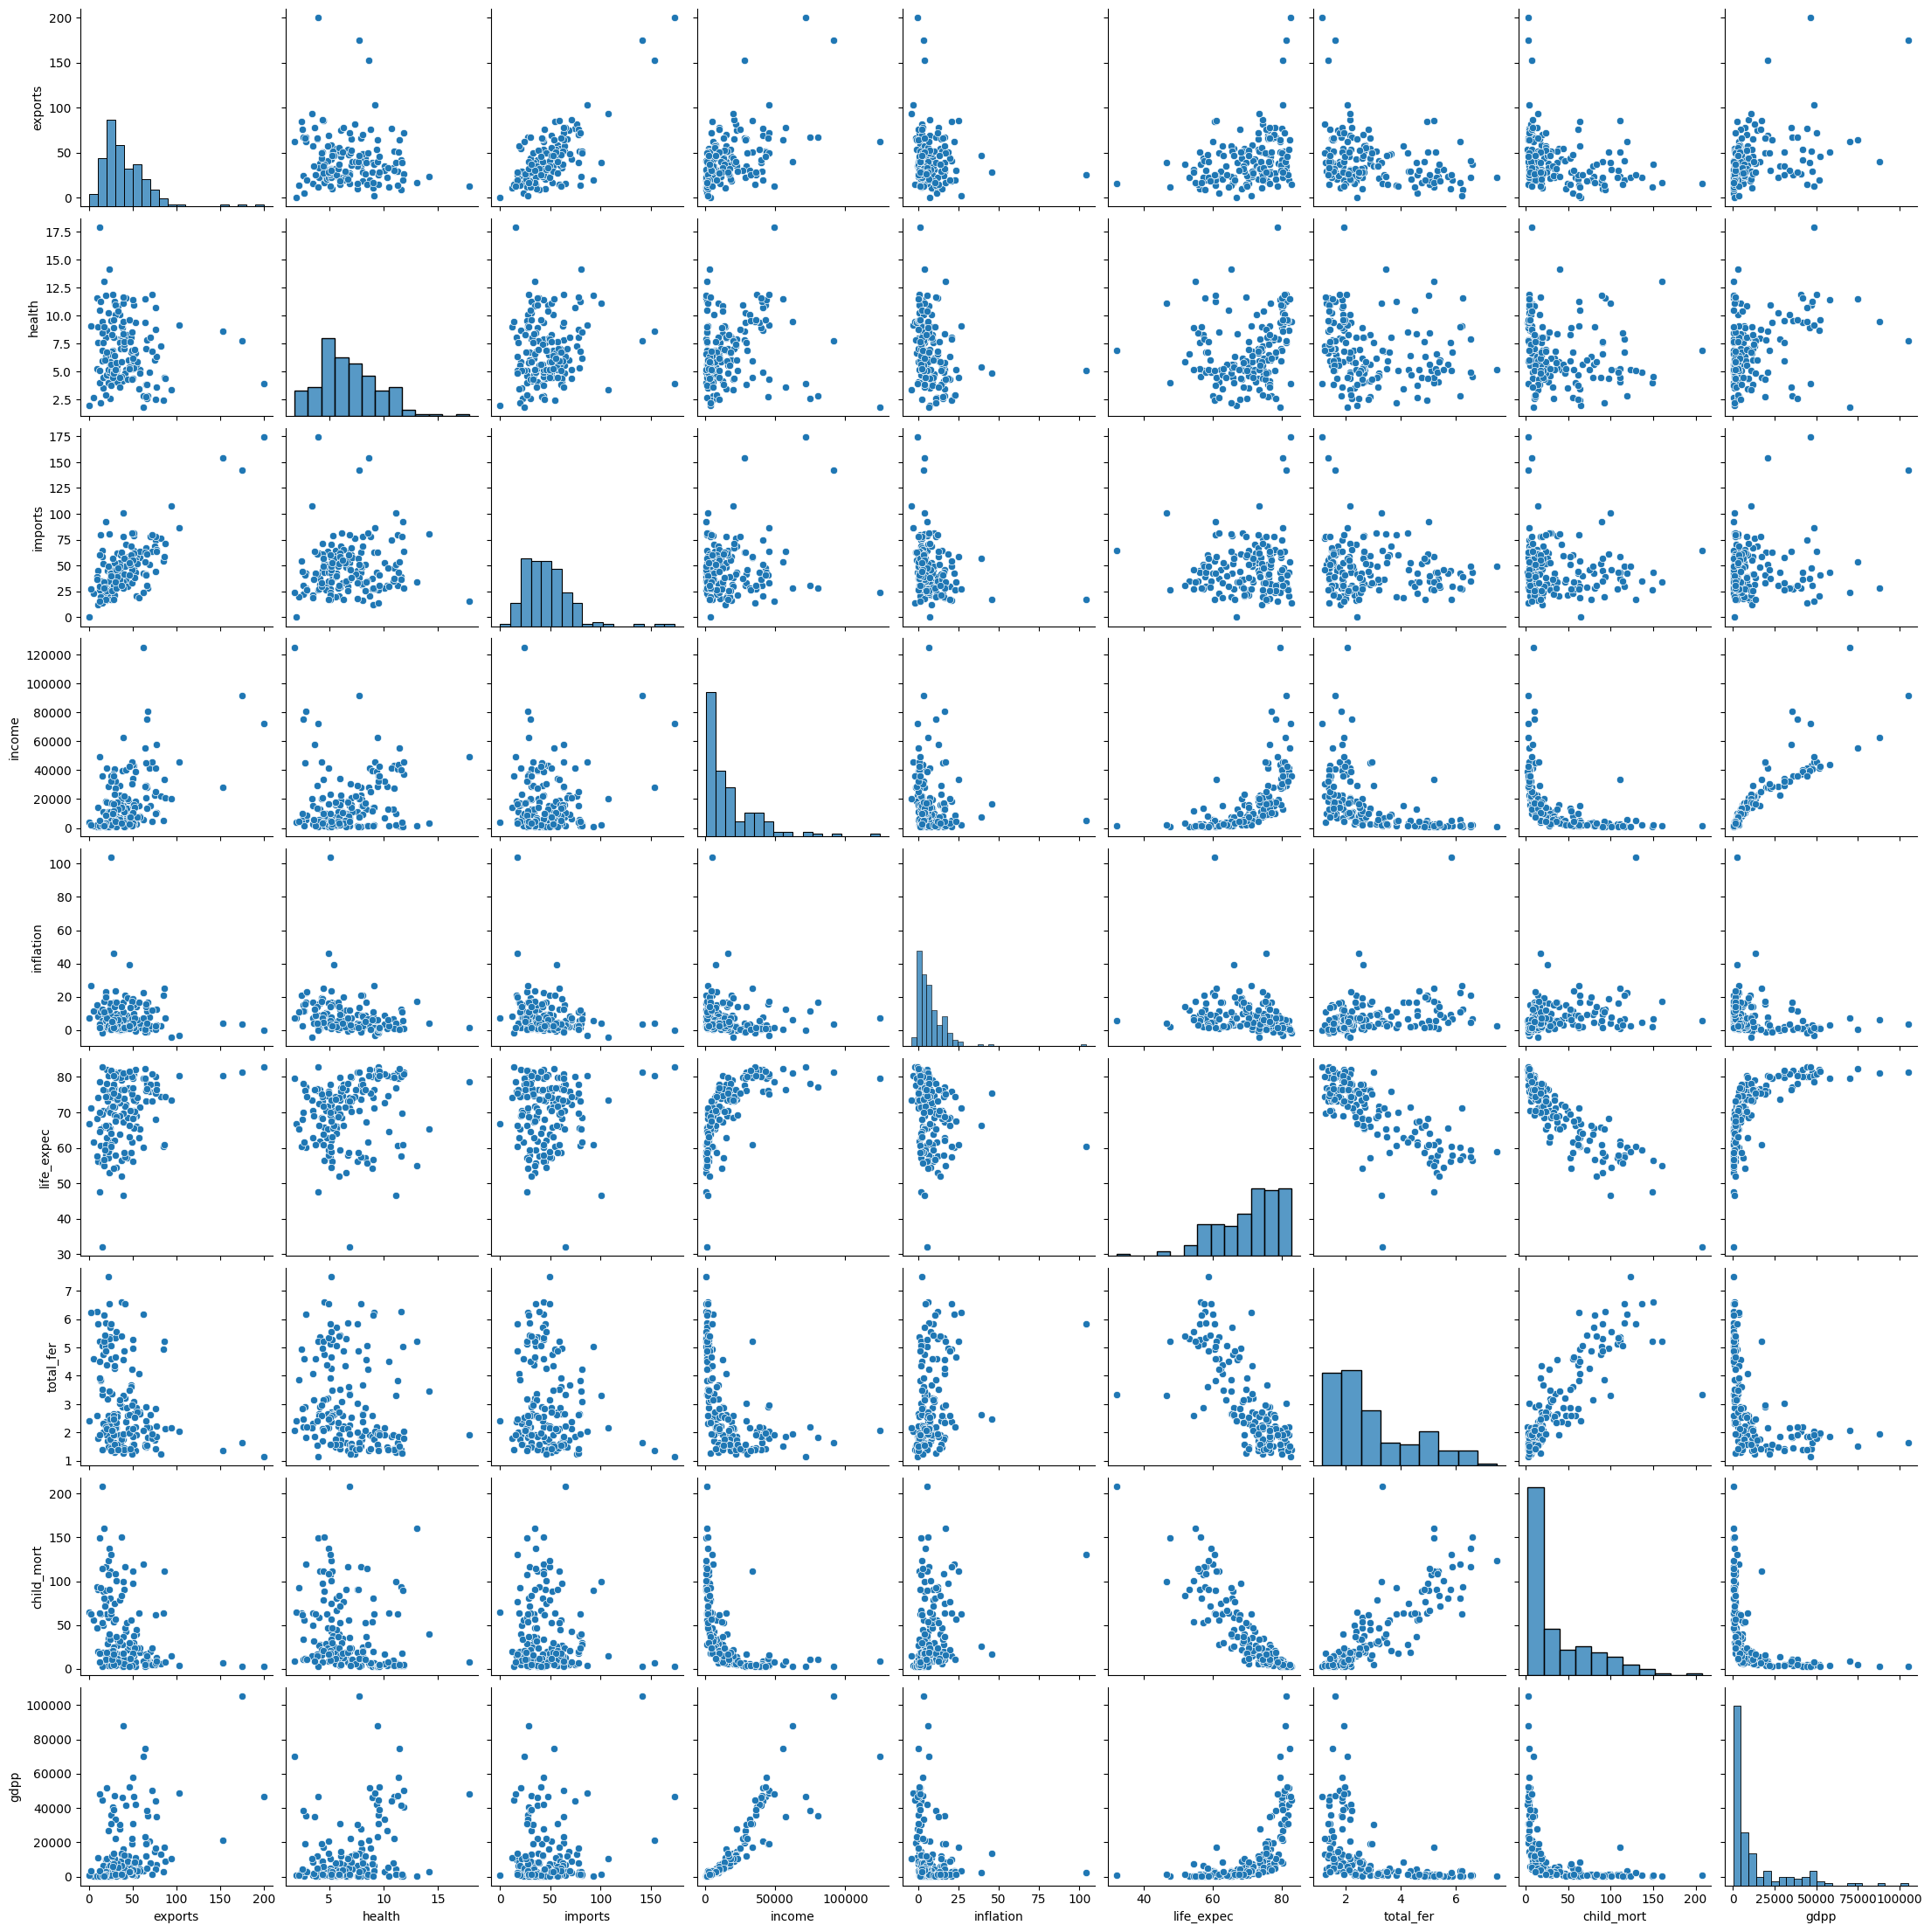

In [25]:
# Create a pair plot
# Hint: Explore seaborn pairplot
# Continuous features
continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort', 'gdpp']

# Create pair plot
sns.pairplot(data[continuous_features])
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.
N.B
Some piarplots have areas of high density of points, suggesting potentia clusters. 
There are some distinct patterns, separation between regions, outliers indicating potential clusters. 
Some variables are highly correlated for example GDPP and income and this indicates the presence of clusters. 

### Scaling the Data

In [30]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
# Continuous features to be normalized
continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
data_scaled = scaler.fit_transform(data[continuous_features])

# Create a DataFrame for the normalized data
df_scaled = pd.DataFrame(data_scaled, columns=continuous_features)


# df_scaled.head()
# Display the first few rows of the normalized dataframe
print(df_scaled.head())

    exports    health   imports    income  inflation  life_expec  total_fer  \
0  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   0.736593   
1  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   0.078864   
2  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   0.274448   
3  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   0.790221   
4  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   0.154574   

       gdpp  
0  0.003073  
1  0.036833  
2  0.040365  
3  0.031488  
4  0.114242  


## K-Means Clustering

### Selecting K

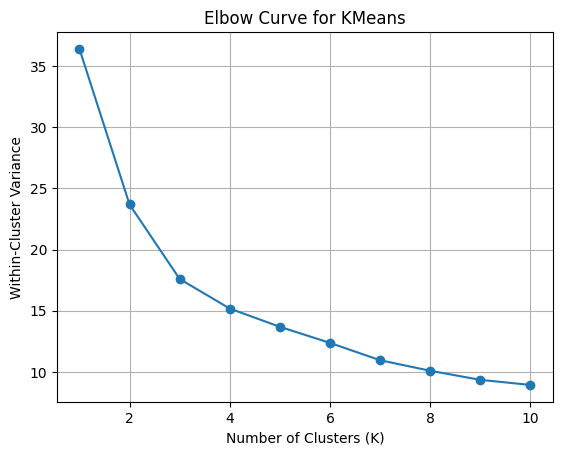

In [48]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    
    plt.xlabel('K')
    plt.ylabel('Inertia')
    
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Variance')
    plt.title('Elbow Curve for KMeans')
    plt.grid(True)
    plt.show()
try:
    # Plot elbow curve using scaled dataset
    elbow_Kmeans(df_scaled, max_k=10)
except Exception as e:
    print("An error occurred:", e)
   

Choosing the appropriate number of clusters 𝐾 from an elbow curve involves identifying the point where the rate of decrease in within-cluster variance (inertia) starts to slow down significantly, forming an "elbow" shape in the curve. This lies between 4 and 6 so K=5 is a good approximation here.

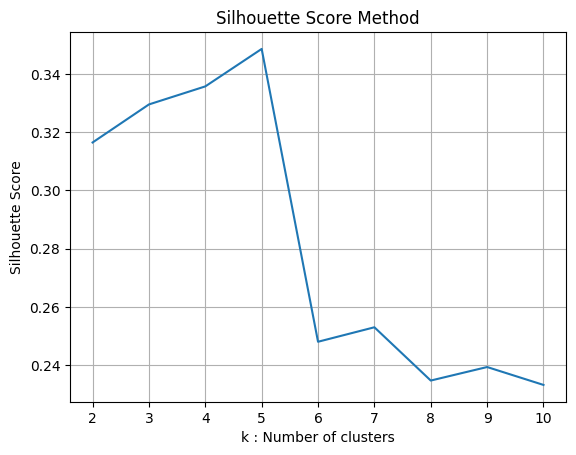

Optimal number of clusters (K) based on silhouette score: 5


In [55]:
# Define the maximum number of clusters to consider
kmax = 10
rseed = 42  # Random seed for reproducibility

# Compute silhouette scores for different values of K
sil = []
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

# Find the value of K that maximizes the silhouette score
optimal_k = range(2, kmax+1)[np.argmax(sil)]

# Plot silhouette scores
sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

print("Optimal number of clusters (K) based on silhouette score:", optimal_k)

# # Silhouette score method
# kmax = 10
# sil = []
# plt.plot()
# for k in range(2, kmax+1):
#     kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
#     kmeans.fit(df_scaled)
#     labels = kmeans.labels_
#     sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))
# # Find the value of K that maximizes the silhouette score
# optimal_k = range(2, kmax+1)[np.argmax(sil)]
# sns.lineplot(x=range(2, kmax+1), y=sil)
# plt.title('Silhouette Score Method')
# plt.xlabel('k : Number of clusters')
# plt.ylabel("Silhouette Score")
# plt.grid(visible=True)
# plt.show()
# print("Optimal number of clusters (K) based on silhouette score:", optimal_k)


Based on the elbow and silhouette score method choose a value for K.
The elbow curve suggests K=5 and the sillhoutte method also suggests a value of K=5. 

## Fitting a K-Means Model with the selected K value

In [56]:
# Remember to set the random_state to rseed
# Define the number of clusters (K)
k = 5

# Initialize KMeans with the selected number of clusters
kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)

# Fit the KMeans model to the scaled data
kmeans.fit(df_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

In [58]:
# Count the number of records in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Display the count of records in each cluster
print("Number of records in each cluster:")
print(cluster_counts)

Number of records in each cluster:
0    87
1    25
2    48
3     4
4     3
Name: count, dtype: int64


In [ ]:
# Check model performance with the silhouette coefficient


## Predictions

In [60]:
# Add the predicted cluster label column to the original dataframe
# Add the predicted cluster label column to the original dataframe
data['Cluster_Labels'] = cluster_labels

# Display the updated dataframe with the cluster labels
print(data.head())

# Calculate the silhouette score for the fitted K-Means model
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Display the silhouette score
print("Silhouette Score:", silhouette_avg)

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster_Labels  
0       9.44        56.2       5.82    553               2  
1       4.49        76.3       1.65   4090               0  
2      16.10        76.5       2.89   4460               0  
3      22.40        60.1       6.16   3530               2  
4       1.44        76.8       2.13  12200               0  
Silhouette Score: 0.3485815660248258


## Visualisation of clusters

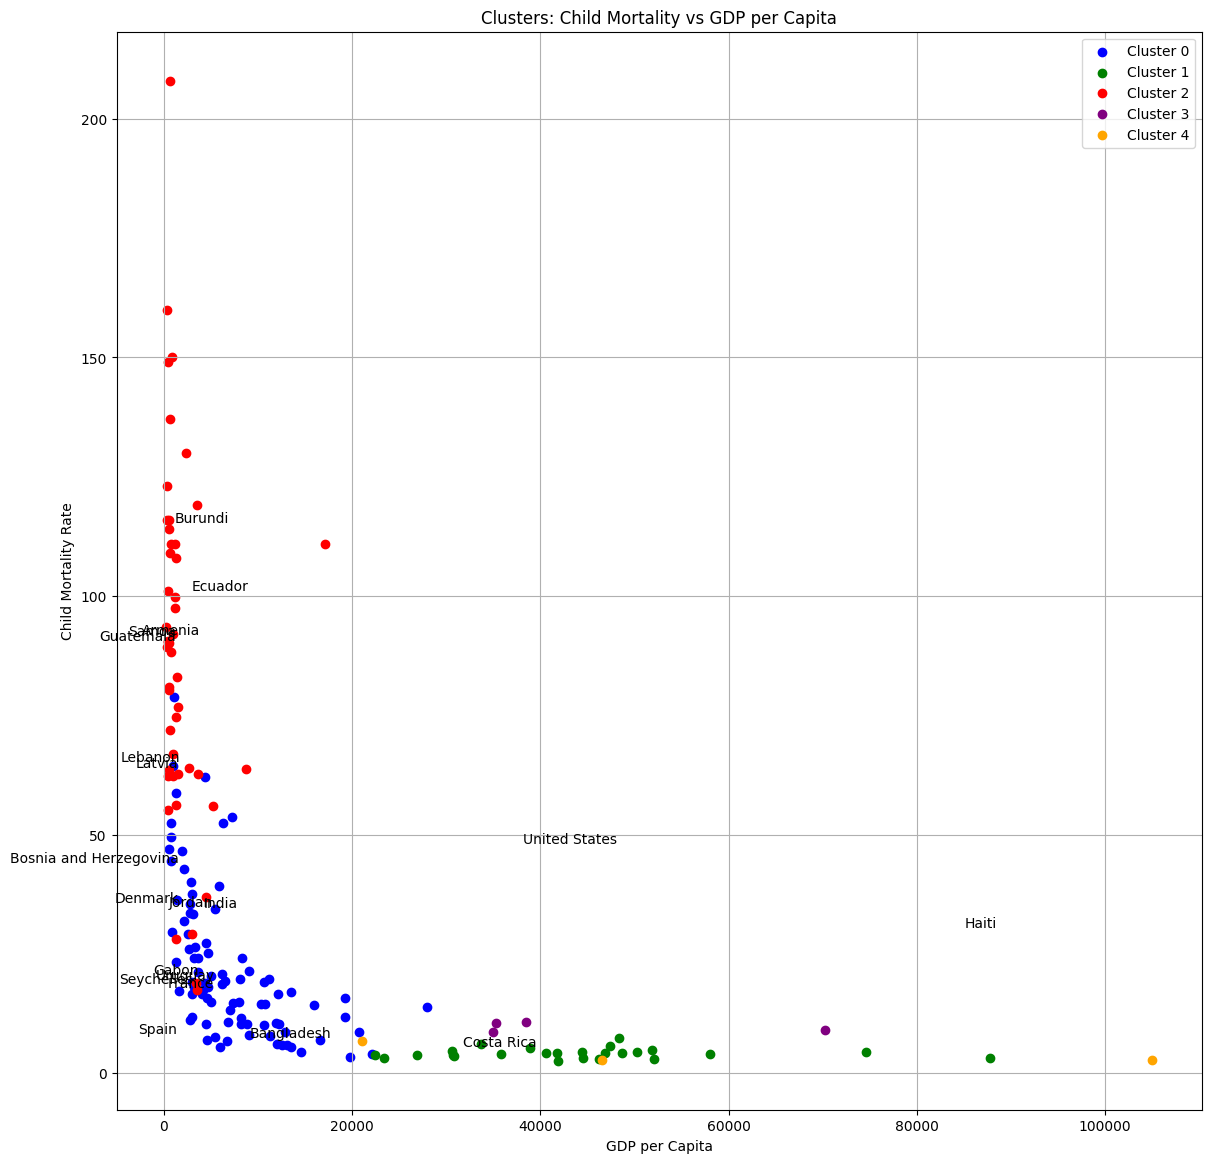

In [66]:
# Visualisation of clusters: child mortality vs gdpp
# Define colors for each cluster
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Adjust as needed based on the number of clusters

# Create a scatter plot of child mortality vs GDP per capita
plt.figure(figsize=(14, 14))  # Larger figure size
for cluster_label, color in zip(range(k), colors):
    cluster_data = data[data['Cluster_Labels'] == cluster_label]
    plt.scatter(cluster_data['gdpp'], cluster_data['child_mort'], color=color, label=f'Cluster {cluster_label}')

# Annotate the plot with labels for a subset of countries
for label, x, y in zip(data['country'].sample(n=20), data['gdpp'].sample(n=20), data['child_mort'].sample(n=20)):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='right')

# Add labels, title, legend, and grid
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality Rate')
plt.title('Clusters: Child Mortality vs GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()
# # Define colors for each cluster
# colors = ['blue', 'green', 'red', 'purple', 'orange']  # Adjust as needed based on the number of clusters

# # Create a scatter plot of child mortality vs GDP per capita
# plt.figure(figsize=(10, 6))
# for cluster_label, color in zip(range(k), colors):
#     cluster_data = data[data['Cluster_Labels'] == cluster_label]
#     plt.scatter(cluster_data['gdpp'], cluster_data['child_mort'], color=color, label=f'Cluster {cluster_label}')

# # Annotate the plot with labels
# for label, x, y in zip(data['country'], data['gdpp'], data['child_mort']):
#     plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='right')

# # Add labels, title, legend, and grid
# plt.xlabel('GDP per Capita')
# plt.ylabel('Child Mortality Rate')
# plt.title('Clusters: Child Mortality vs GDP per Capita')
# plt.legend()
# plt.grid(True)
# plt.show()

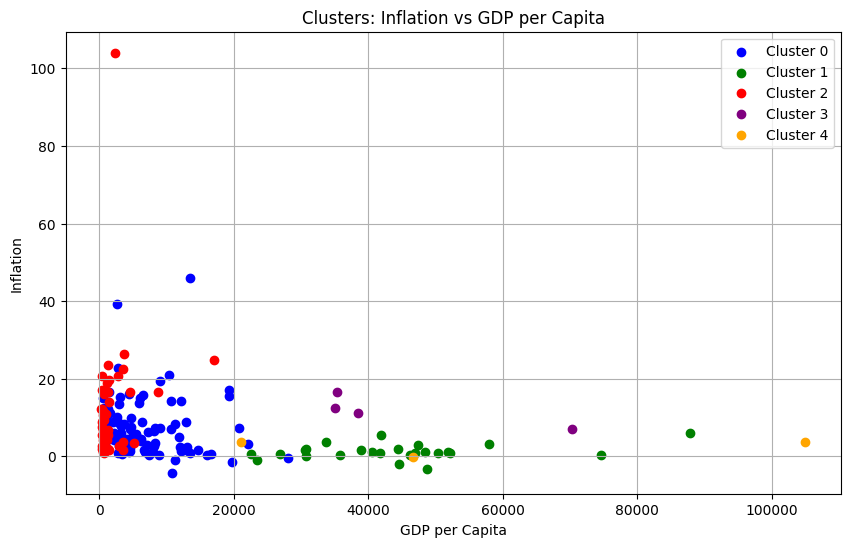

In [61]:
# Visualisation of clusters: inflation vs gdpp
# Define colors for each cluster
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Adjust as needed based on the number of clusters

# Create a scatter plot of inflation vs GDP per capita
plt.figure(figsize=(10, 6))
for cluster_label, color in zip(range(k), colors):
    cluster_data = data[data['Cluster_Labels'] == cluster_label]
    plt.scatter(cluster_data['gdpp'], cluster_data['inflation'], color=color, label=f'Cluster {cluster_label}')

plt.xlabel('GDP per Capita')
plt.ylabel('Inflation')
plt.title('Clusters: Inflation vs GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**